# 너와 나의 연결다리

In [3]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pylab as plt

import seaborn as sns
sns.set()

In [116]:
subway_2018 = pd.read_excel('../project_data/subway/seoul_2018_data.xlsx', encoding='euc-kr')

In [ ]:
subway_2017 = pd.read_excel('../project_data/subway/seoul_2017_data.xlsx', encoding='euc-kr')

In [ ]:
subway_2016 = pd.read_excel('../project_data/subway/seoul_2016_data.xlsx', encoding='euc-kr')

In [12]:
subway_month = pd.read_csv('../project_data/subway/seoul_subway_month_data.csv', encoding='euc-kr')

In [117]:
subway_2018 = subway_2018.rename(columns=subway_2018.iloc[0])
subway_2018 = subway_2018.drop(0)

In [118]:
subway_2018.head()

,날짜,호선,역번호,역명,구분,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01,합 계
1,2018-01-01 00:00:00,1호선,150,서울역,승차,373,318,365,785,1047,...,3476,3891,3227,2945,2382,3070,1750,781,96,40393
2,2018-01-01 00:00:00,1호선,150,서울역,하차,205,1040,872,984,1650,...,2885,2845,2337,2131,1669,1404,868,477,147,34730
3,2018-01-01 00:00:00,1호선,151,시청,승차,87,105,124,197,291,...,1027,1102,1278,1163,1032,975,553,214,9,12298
4,2018-01-01 00:00:00,1호선,151,시청,하차,47,294,497,1017,673,...,781,702,552,388,308,236,160,100,39,10945
5,2018-01-01 00:00:00,1호선,152,종각,승차,604,399,191,250,370,...,2127,2172,2171,1873,1935,2084,1458,580,28,22621


In [119]:
subway_2018['날짜'] = subway_2018['날짜'].apply(lambda x: str(x).split()[0])

----------

In [120]:
tmp = subway_2018[['2018-01' in x for x in subway['날짜']]]

In [109]:
tmp[tmp['역명'] == '시청'][tmp['호선'] == '2호선'].iloc[:,4:].groupby('구분').sum()

C:\Users\1-17\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,13 ~ 14,14 ~ 15,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01,합 계
구분,,,,,,,,,,,,,,,,,,,,,
승차,1516,2390,5808,8998,11088,16137,23313,23503,30037,36166,...,44449,75077,185142,86483,54574,51536,34918,14653,2238,749935
하차,1701,16302,86989,232383,90471,31164,28352,27122,30839,28801,...,22968,22413,23558,15008,7871,6737,6287,4293,1620,710330


--------

In [121]:
target_station = ['합정', '홍대입구','신촌','이대','아현','충정로','시청','을지로입구','을지로3가','을지로4가','동대문역사문화공원','신당','상왕십리','왕십리','한양대','뚝섬','성수','건대입구','구의','강변']

In [130]:
target_df_included = subway_2018[[x in target_station for x in subway_2018['역명']]]

In [137]:
target_df_included = target_df_included[target_df_included['호선'] == '2호선']

In [139]:
target_df_included

,날짜,호선,역번호,역명,구분,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01,합 계
21,2018-01-01,2호선,201,시청,승차,37,57,77,106,179,...,698,798,765,630,633,617,392,176,2,8115
22,2018-01-01,2호선,201,시청,하차,35,160,253,418,326,...,446,390,367,263,215,175,160,126,17,5897
23,2018-01-01,2호선,202,을지로입구,승차,128,116,127,205,373,...,1798,2139,2478,2001,1862,2196,1804,863,13,22944
24,2018-01-01,2호선,202,을지로입구,하차,109,431,647,1246,1139,...,1759,1548,1464,988,757,499,419,223,297,21587
25,2018-01-01,2호선,203,을지로3가,승차,42,79,98,124,215,...,545,619,539,427,367,342,237,98,0,7111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200300,2018-12-31,2호선,240,신촌,하차,109,504,1320,3141,3552,...,3199,3968,5060,4016,2494,2120,1890,1359,5868,56846
200301,2018-12-31,2호선,241,이대,승차,79,188,533,802,558,...,1901,2129,2066,1378,945,964,838,806,471,21181
200302,2018-12-31,2호선,241,이대,하차,39,192,338,1754,1386,...,1398,1350,1524,1282,628,584,560,432,1875,22538
200303,2018-12-31,2호선,242,아현,승차,130,269,825,1161,732,...,650,729,711,474,370,329,236,153,288,10679


In [155]:
graph_target = target_df_included[target_df_included['구분'] == '승차'][['역명','07 ~ 08','08 ~ 09','09 ~ 10']].groupby('역명').sum()

In [183]:
graph = pd.DataFrame(graph_target.sum(axis = 1))

In [189]:
graph = graph.rename(columns={0 : 'sum'})

In [193]:
graph = graph.reset_index()

In [195]:
column_number = {}
for i, column in enumerate(target_station):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

graph['역명'] = graph['역명'].apply(lambda x: to_number(x, column_number))

In [197]:
graph

,역명,sum
0,17,2977798
1,10,528915
2,15,997572
3,12,1664930
4,16,1099779
5,6,333783
6,11,1246114
7,2,1748637
8,4,1095589
9,8,390456


<BarContainer object of 16 artists>

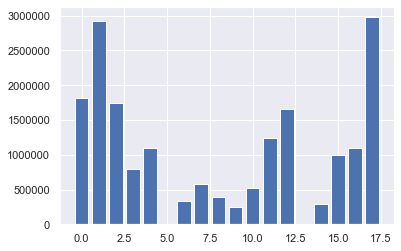

In [196]:
plt.bar(graph['역명'], graph['sum'])

- target(y) : 18 ~ 20 퇴근시간의 target_station list의 승하차 예측
- X : 출근 시간 및